In [3]:
import pandas as pd 

df=pd.read_csv('RELIANCE.NS.csv')
# Remove the entries with 0 as open price
df=df[df['Open'] != 0]
df['PriceMvt']=df.Close-df.Open
print(df)

            Date         Open         High  ...    Adj Close    Volume   PriceMvt
0     01-01-1996    16.009800    16.095699  ...     2.422041  47600787   0.058500
1     02-01-1996    16.029301    16.107401  ...     2.403215  77143764  -0.085901
2     03-01-1996    16.205000    16.943001  ...     2.421453  95695836  -0.140600
3     04-01-1996    15.912100    15.962900  ...     2.399085  99159504   0.003900
4     05-01-1996    15.853600    15.853600  ...     2.382609  76213503  -0.046900
...          ...          ...          ...  ...          ...       ...        ...
6300  28-12-2020  2006.699951  2018.000000  ...  2003.300049   7947719  -3.399902
6301  29-12-2020  2009.000000  2012.300049  ...  1990.050049   8589407 -18.949951
6302  30-12-2020  1995.250000  2007.199951  ...  1995.500000  10173132   0.250000
6303  31-12-2020  1993.500000  2011.900024  ...  1985.300049   8667516  -8.199951
6304  01-01-2021  1988.000000  1997.000000  ...  1987.500000   4622002  -0.500000

[6178 rows x 8 

In [ ]:
pcount=0
pavg=0
ncount=0
navg=0
for row in df.itertuples():
  if row[8] > 0:
    pavg+=row[8]/row[2]
    pcount+=1
  else:
    navg+=abs(row[8])/row[2]
    ncount+=1
print("no of positive days:",pcount)
print("Avg movement on posotive days",(pavg/pcount)*100)
print("no of negative days:",ncount)
print("Avg movement on negative days:",(navg/ncount)*100)

no of positive days: 2887
Avg movement on posotive days 1.5713304370965213
no of negative days: 3291
Avg movement on negative days: 1.541860462518493


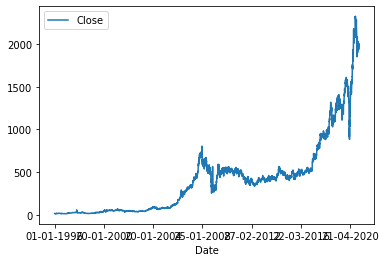

In [ ]:
import matplotlib.pyplot as plt
df.plot(x="Date", y="Close", kind="line")
plt.show()

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,PriceMvt
count,6178.000000,6178.000000,6178.000000,6178.000000,6178.000000,6.178000e+03,6178.000000
mean,409.713368,415.015321,403.914649,409.230004,375.288314,3.107981e+07,-0.483363
std,437.282603,442.506753,431.281009,436.563646,439.160794,4.979035e+07,11.376882
min,11.948700,12.557900,11.874600,12.003400,1.809322,0.000000e+00,-149.550049
25%,50.762699,51.582699,49.679050,50.789999,24.434673,7.296698e+06,-2.449993
50%,389.199997,395.000000,382.649994,389.250000,339.470398,1.387650e+07,-0.101803
75%,517.562515,524.237503,510.587501,517.412476,466.726600,3.358812e+07,1.724976
max,2325.000000,2369.350098,2310.550049,2324.550049,2324.550049,6.623833e+08,130.899902


In [12]:
def SMA(df, base, target, period):
    """
    Function to compute Simple Moving Average (SMA)
    
    Args :
        df : Pandas DataFrame which contains ['date', 'open', 'high', 'low', 'close', 'volume'] columns
        base : String indicating the column name from which the SMA needs to be computed from
        target : String indicates the column name to which the computed data needs to be stored
        period : Integer indicates the period of computation in terms of number of candles
        
    Returns :
        df : Pandas DataFrame with new column added with name 'target'
    """

    df[target] = df[base].rolling(window=period).mean()
    df[target].fillna(0, inplace=True)

    return df

SMA_df= SMA(df, "Close", "Sma", 14)
print(SMA_df)

            Date         Open         High  ...    Volume   PriceMvt          Sma
0     01-01-1996    16.009800    16.095699  ...  47600787   0.058500     0.000000
1     02-01-1996    16.029301    16.107401  ...  77143764  -0.085901     0.000000
2     03-01-1996    16.205000    16.943001  ...  95695836  -0.140600     0.000000
3     04-01-1996    15.912100    15.962900  ...  99159504   0.003900     0.000000
4     05-01-1996    15.853600    15.853600  ...  76213503  -0.046900     0.000000
...          ...          ...          ...  ...       ...        ...          ...
6300  28-12-2020  2006.699951  2018.000000  ...   7947719  -3.399902  1983.610718
6301  29-12-2020  2009.000000  2012.300049  ...   8589407 -18.949951  1983.346436
6302  30-12-2020  1995.250000  2007.199951  ...  10173132   0.250000  1981.100011
6303  31-12-2020  1993.500000  2011.900024  ...   8667516  -8.199951  1979.550014
6304  01-01-2021  1988.000000  1997.000000  ...   4622002  -0.500000  1978.242868

[6178 rows x 9 

NameError: ignored

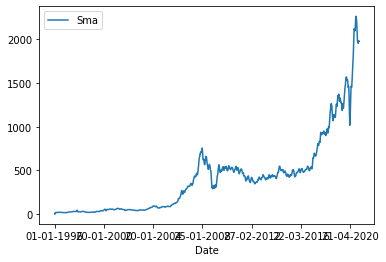

In [13]:
import matplotlib.pyplot as plt
df.plot(x="Date", y="Sma", kind="line")
plt.show()

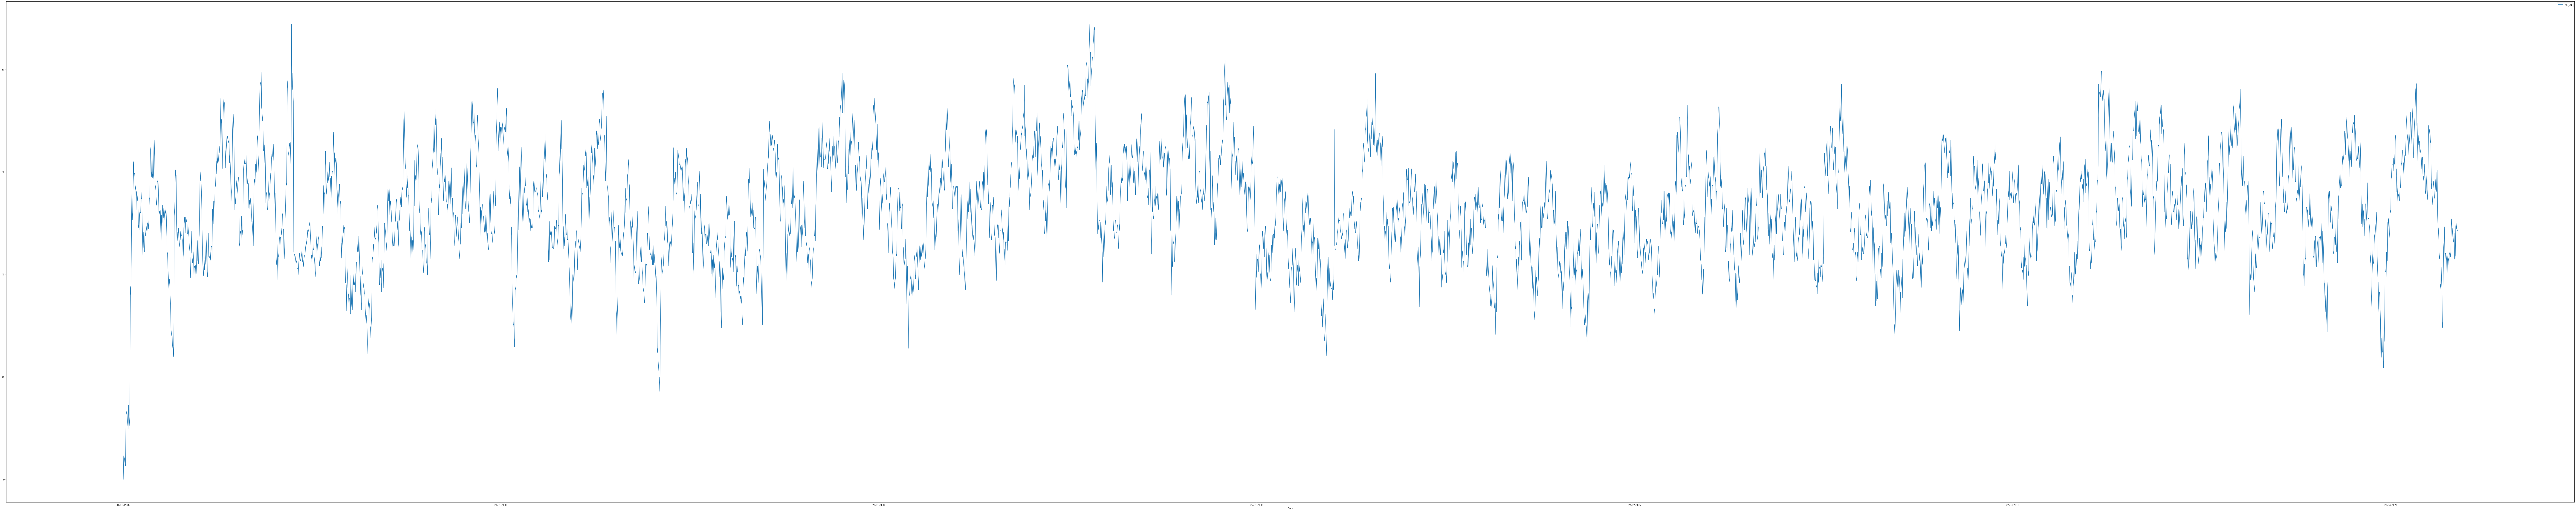

In [24]:
def RSI(df, base="Close", period=21):
    """
    Function to compute Relative Strength Index (RSI)
    
    Args :
        df : Pandas DataFrame which contains ['date', 'open', 'high', 'low', 'close', 'volume'] columns
        base : String indicating the column name from which the MACD needs to be computed from (Default Close)
        period : Integer indicates the period of computation in terms of number of candles
        
    Returns :
        df : Pandas DataFrame with new columns added for 
            Relative Strength Index (RSI_$period)
    """
 
    delta = df[base].diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0
    
    rUp = up.ewm(com=period - 1,  adjust=False).mean()
    rDown = down.ewm(com=period - 1, adjust=False).mean().abs()

    df['RSI_' + str(period)] = 100 - 100 / (1 + rUp / rDown)
    df['RSI_' + str(period)].fillna(0, inplace=True)

    return df

RSI_df = RSI(df)
# print(RSI_df)
import matplotlib.pyplot as plt
# plt.figure(figsize=(100,10))
RSI_df.plot(x="Date", y="RSI_21", kind="line", figsize=(200,40))
plt.show()